# Identitas
**Nama : Azka Fauzi Al Parisi**

**NPM  : 197006057**

**Kelas : B**

# Business Understanding


Data ini merupakan dataset tentang film dari tahun 1980 - 2020. Saya ambil data ini dari kaggle "Movie Industry" by Daniel Grijalvas

https://www.kaggle.com/datasets/danielgrijalvas/movies

Datasets memuat  kumpulan data yang berfokus pada pendapatan film dan menganalisisnya selama beberapa dekade terakhir. Analisis ini bertujuan untuk mencari tau hubungan setiap atribut pada datasets seperti aktor, genre, peringkat pengguna, dan lainnya. Hasil dari analisa ini yaitu atribut mana yang memiliki korelasi terkuat diantara semua atribut.

Ada 6820 film dalam kumpulan data

# Data Understanding

Beberapa atribut yang terdapat pada dataset

budget: anggaran film

company: perusahaan produksi

country: negara asal film

director: sutradara

genre: jenis atau genre utama film

gross: pendapatan kotor film

name: nama film

rating: peringkat film (R, PG, etc.)

released: tanggal rilis (YYYY-MM-DD)

runtime: durasi film

score: peringkat pengguna IMDB

votes: voting atau suara dari penonton

star: aktor/aktris utama

writer: penulis film

year: tahun rilis

## Mengumpulkan Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/uts/movies.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Menelaah Data

In [ ]:
print(df.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


In [ ]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [ ]:
len(df)

7668

In [ ]:
df.shape

(7668, 15)

In [ ]:
df.year.min(), df.year.max()

(1980, 2020)

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


year       2.000405e+03
score      6.390411e+00
votes      8.810850e+04
budget     3.558988e+07
gross      7.850054e+07
runtime    1.072616e+02
dtype: float64

## Memvalidasi Data

In [ ]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [ ]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# Data Preparation

In [ ]:
# Melihat missing valuenya
for col in df.columns:
    no_missing = df[col].isnull().sum()
    print(f"{col} - {no_missing}")

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
# Mengahapus data budget atau gross yang bernilai kosong
df.dropna(subset=['budget', 'gross'], inplace = True)

# mengkonversi type data menjadi int64
df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')

In [ ]:
# melihat jumlah kolom dan baris
df.shape

(5436, 15)

In [ ]:
temp_df = df.loc[(df['year'] == 2020),].sort_values(['gross'], ascending=False)
temp_df[['name','gross','budget']].head()

,name,gross,budget
7652,The Eight Hundred,461421559,80000000
7648,Bad Boys for Life,426505244,90000000
7643,Tenet,363656624,205000000
7649,Sonic the Hedgehog,319715683,85000000
7650,Dolittle,245487753,175000000


In [ ]:
temp_df[['year','name','gross','budget']].iloc[:3]

,year,name,gross,budget
7652,2020,The Eight Hundred,461421559,80000000
7648,2020,Bad Boys for Life,426505244,90000000
7643,2020,Tenet,363656624,205000000


In [ ]:
#simpan kerangka data yang telah dibersihkan

df0 = df

In [ ]:
"""
Beberapa film memiliki kolom tahun ke tahun dan kolom rilis yang berbeda,
jadi saya mengekstrak tahun dari dirilis ke tahun dirilis untuk konsistensi
"""
def get_year(date):
    if '(' in date:
        date = date[:date.index('(')]
    return date[-5:].strip()
df['released year'] = df.released.apply(lambda date: get_year(str(date)))
df['released year'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: released year, dtype: object

In [ ]:
# "year" dan "released date" harus sama maka ambil 4 digit pertama dari "release date" dan letakkan di kolom baru "year_correct"

def get_year(date):
    if "(" in date:
        date = date[:date.index("(")]
    return date.split(",")[-1].strip().split(" ")[-1]

temp1_df = df

temp1_df['year_correct'] = temp1_df['released'].apply(lambda x: get_year(str(x)))

temp1_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,1980


In [ ]:
df.dtypes

name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget             int64
gross              int64
company           object
runtime          float64
released year     object
year_correct      object
dtype: object

In [ ]:
df['released year'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: released year, dtype: object

In [ ]:
df['release_year']=df['released year'].astype('int64')

In [ ]:
df['release_year'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: release_year, dtype: int64

In [ ]:
df.release_year.min(), df.release_year.max()

(1980, 2020)

In [ ]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [ ]:
df.shape

(5436, 18)

In [ ]:
# Remove any duplicates   Note: this only show duplicates.  The real removal needs .drop_duplicates()
df.duplicated().head()

5445    False
7445    False
3045    False
6663    False
7244    False
dtype: bool

In [ ]:
df.duplicated()

5445    False
7445    False
3045    False
6663    False
7244    False
        ...  
2434    False
3681    False
272     False
2417    False
3203    False
Length: 5436, dtype: bool

In [ ]:
df.shape

(5436, 18)

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year_correct,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018,2018


In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year_correct,release_year
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009,2009
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019,2019
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997,1997
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015,2015
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018,2018


In [ ]:
df.shape

(5436, 18)

In [ ]:
pd.set_option('display.max_rows', 15)

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year_correct,release_year
0,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,2009,2009
1,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,2019,2019
2,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,1997,1997
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,2015,2015
4,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,2018,2018


**Budget Vs Gross**

In [ ]:
type(df.budget)

pandas.core.series.Series

In [ ]:
df.budget.dtypes

dtype('int64')

No handles with labels found to put in legend.


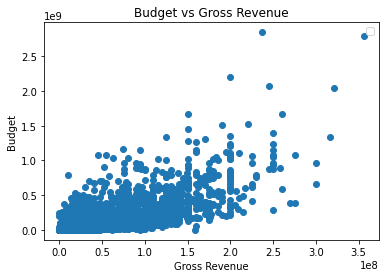

In [ ]:
# Scatter plot budget vs gross
plt.scatter(x=df.budget, y=df.gross)
plt.title('Budget vs Gross Revenue')

plt.xlabel('Gross Revenue')
plt.ylabel('Budget')

plt.legend()

plt.show()


No handles with labels found to put in legend.


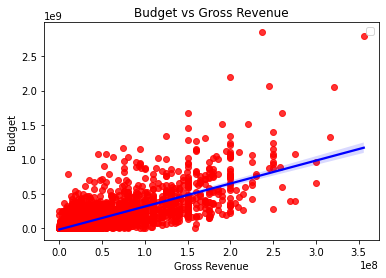

In [ ]:
# Plot budget vs gross using seaborn
ax1 = sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

ax1.set_title('Budget vs Gross Revenue')

#ax1.set_xlabel('Gross Revenue')
#ax1.set_ylabel('Budget')

plt.xlabel('Gross Revenue')
plt.ylabel('Budget')

plt.legend()

In [ ]:
# calculate the corr
df.corr()

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
release_year,0.998641,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


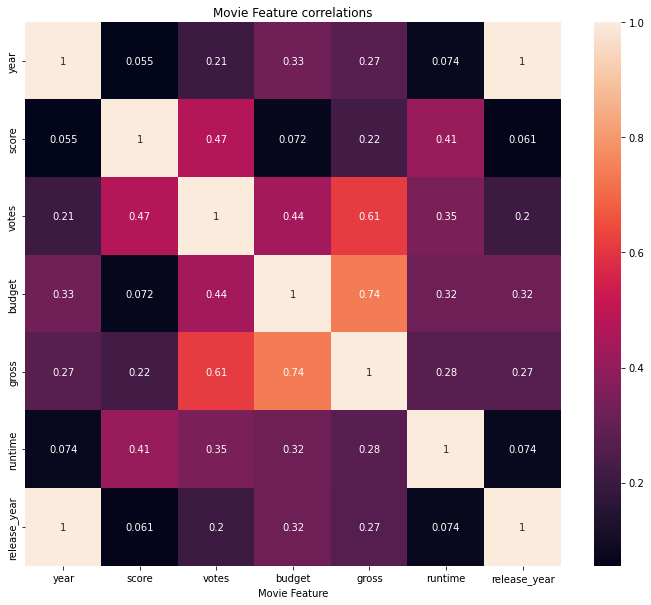

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Movie Feature correlations")
plt.xlabel("Movie Feature")
plt.show()

**Gross VS Company**

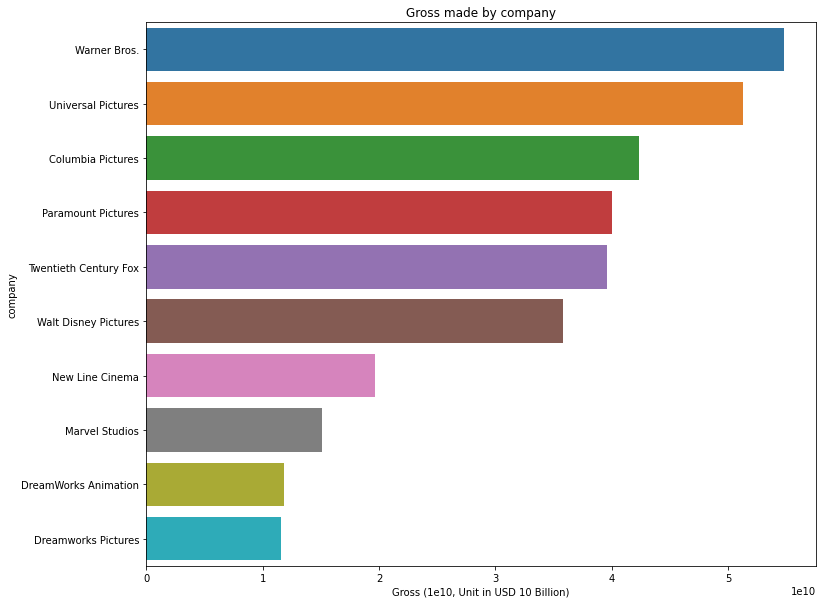

In [ ]:
plt.figure(figsize=(12,10))
df1 = df.groupby("company")['gross'].sum()
df1 = df1.reset_index().sort_values("gross", ascending=False)
sns.barplot(x = 'gross', y = 'company', data = df1[:10])
plt.title("Gross made by company")
plt.xlabel("Gross (1e10, Unit in USD 10 Billion)")
plt.show()

Sebenarnya data tidak menunjukkan korelasi apa pun antara company dan gross. masalahnya adalah company adalah string bukan nilai numerik jadi mengubahnya menjadi tipe data kategori dan menetapkan setiap orang dengan nomor.

In [ ]:
df2 = df.copy()
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype('category')
        df2[col] = df2[col].cat.codes
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year,year_correct,release_year
0,387,5,0,2009,528,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0,29,29,2009
1,389,5,0,2019,138,8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0,39,39,2019
2,4923,5,6,1997,535,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0,17,17,1997
3,3656,5,0,2015,530,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,35,35,2015
4,390,5,0,2018,146,8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0,38,38,2018


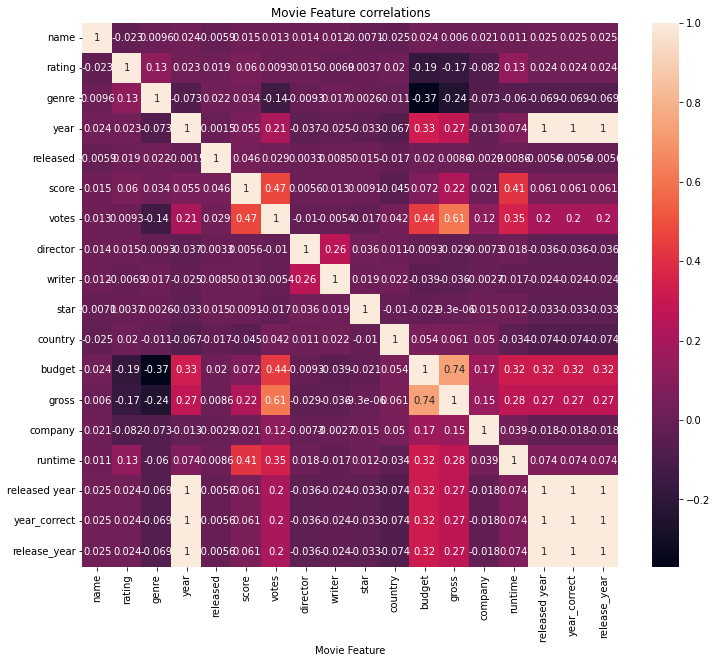

In [ ]:
# now we can look at the correlation again
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(), annot=True)
plt.title("Movie Feature correlations")
plt.xlabel("Movie Feature")
plt.show()

In [ ]:
# tampilan korelasi
pd.set_option('display.max_rows', None)
corr_pairs = df2.corr().unstack()
corr_pairs = corr_pairs.sort_values()

In [ ]:
corr_pairs[(corr_pairs > 0.5) & (corr_pairs != 1)]

votes          gross            0.614904
gross          votes            0.614904
               budget           0.740395
budget         gross            0.740395
year_correct   year             0.998641
year           year_correct     0.998641
               released year    0.998641
released year  year             0.998641
release_year   year             0.998641
year           release_year     0.998641
released year  release_year     1.000000
release_year   released year    1.000000
               year_correct     1.000000
year_correct   release_year     1.000000
dtype: float64

Berdasarkan hasil analisa tersebut, dapat dikatakan bahwa gross tidak memiliki koreasi yang kuat dengan company/perusahaan produksi. Namun, gross dan votes memiliki korelasi yang cukup kuat